In [49]:
import pandas as pd
import nltk
# nltk.download()
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



In [50]:
# Import Data
data = pd.read_csv('Videos_data.csv')


In [51]:
data.head(10)

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel
5,5,yvn79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
6,6,SL_YBLWdZb8,Welcome to Peru! | Best Essential Tips &amp; T...,Welcome to Peru! This essential travel guide w...,travel
7,7,kiNyRY5s7n8,How to Start a Travel Blog [2019] Travel Blogg...,Create a Travel Blog Website for Just $3.95 + ...,travel
8,8,kY41XgTEEQU,A Day with KSRTC Bus Fans - Aanavandi Travel B...,ആനവണ്ടി ഭ്രാന്തൻമാരോടൊപ്പം കുമളിയിൽ ഒരു ദിവസം ...,travel
9,9,7mIzRYh8jGA,What is it like to travel in PAKISTAN?,Subscribe now: https://goo.gl/6zXZGK Watch the...,travel


In [52]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [53]:
data.isnull().sum()

Video Id         0
Title            0
Description    334
Category         0
dtype: int64

In [54]:
null_data = data[data['Description'].isnull()]


In [55]:
for i in null_data['Title']:
    dup_data = data[data['Title'] == i ]
    print(dup_data)
    

       Video Id                   Title Description Category
60  DQIuu5qDCyo  ROXAS CITY TRAVEL BLOG         NaN   travel
        Video Id                                      Title Description  \
209  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   
341  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   

    Category  
209   travel  
341   travel  
        Video Id                                     Title Description  \
213  qdLl1rVW6GE  Hạ Long 2019/Nghỉ lễ đi đâu?/Travel Blog         NaN   

    Category  
213   travel  
        Video Id                                        Title Description  \
337  1c7_140xDqQ  Travel blog: Malaysia to Singapore and back         NaN   
421  1c7_140xDqQ  Travel blog: Malaysia to Singapore and back         NaN   

    Category  
337   travel  
421   travel  
        Video Id                                      Title Description  \
209  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   
3

         Video Id                                              Title  \
2383  ywbcT2BFuDU  Top 10 Coolest Army Science and Technology Adv...   

     Description                Category  
2383         NaN  science and technology  
         Video Id                                              Title  \
2395  sUWTefcLQjE  TU Delft - testimonials MSc Life Science &amp;...   

     Description                Category  
2395         NaN  science and technology  
         Video Id                                              Title  \
2187  1TnUKWdFQfI  Ministry of Science and Technology, ROC (English)   
2429  1TnUKWdFQfI  Ministry of Science and Technology, ROC (English)   

     Description                Category  
2187         NaN  science and technology  
2429         NaN  science and technology  
         Video Id                                              Title  \
2458  EJZXXKJ_Q4k  Science and Technology bits in telugu for aAPP...   

     Description                Category  
2458

         Video Id                                      Title Description  \
5298  i8kxymmjdoM  Semiconductor manufacturing process video         NaN   
5941  i8kxymmjdoM  Semiconductor manufacturing process video         NaN   

           Category  
5298  manufacturing  
5941  manufacturing  
         Video Id                      Title Description       Category
5320  US3Zt7_1Wjk  Seamless Pipe manufacture         NaN  manufacturing
6004  US3Zt7_1Wjk  Seamless Pipe manufacture         NaN  manufacturing
         Video Id                      Title Description       Category
5333  Z92XGAHp5Cs  Diversified Manufacturing         NaN  manufacturing
         Video Id               Title Description       Category
5346  BSvYHSd8rKA  Wise Manufacturing         NaN  manufacturing
5364  BSvYHSd8rKA  Wise Manufacturing         NaN  manufacturing
6007  BSvYHSd8rKA  Wise Manufacturing         NaN  manufacturing
         Video Id               Title Description       Category
5346  BSvYHSd8rKA  W

         Video Id                                              Title  \
7012  bp5uzgq5seQ  Decifrando Códigos: Sociedades Secretas (Histo...   

     Description Category  
7012         NaN  history  
         Video Id                              Title Description Category
7026  ADAWkyDLKBc  A vida medieval - History Channel         NaN  history
         Video Id                              Title Description Category
7052  9xMNjYX7KIQ  Martinho Lutero - History Channel         NaN  history
         Video Id                                              Title  \
7060  OnP-JZC4WBw  History Documentary - Titanic: Secrets Reveale...   

     Description Category  
7060         NaN  history  
         Video Id                                         Title Description  \
7070  41s-Hg1zahc  ZDF History  Die großen Skandale der Medizin         NaN   

     Category  
7070  history  
         Video Id                                              Title  \
7354  yzLT6_TQmq8  Propellerheads feat:

         Video Id                                              Title  \
7971  ZmKrJlpdHAI  Anthropologist Nikhil Anand, Urban Planner Rah...   

     Description Category  
7971         NaN  history  
         Video Id                              Title Description Category
7972  9MEFw-cf5Q0  screencast test- Anthropology 102         NaN  history
         Video Id                               Title Description Category
7987  z4OXiZNi3z0  Karl Pilkington the Anthropologist         NaN  history
         Video Id                                              Title  \
7990  xtxp2AlQdP4  Jesus Christ was a Ghanaian, an Akyem – Anthro...   

     Description Category  
7990         NaN  history  
         Video Id                                              Title  \
8003  IZ3LrLI5LzE  Ceramic Composition with Dr  Lindsay Bloch Flo...   

     Description Category  
8003         NaN  history  
         Video Id                          Title Description Category
8026  5Cr6VUboOr0  CAREER IN 

In [56]:
print(data.shape)
data = data.dropna(how='any')
print(data.shape)

(10333, 4)
(9999, 4)


In [57]:
data['Category'].value_counts()

food                      1695
manufacturing             1673
art and music             1672
travel                    1671
science and technology    1656
history                   1632
Name: Category, dtype: int64

In [58]:
#### You can download the stopwords and wordnet by uncommenting

# nltk.download('stopwords')
# nltk.download('wordnet')

In [59]:
stop_words = set(stopwords.words('english'))
##Creating a list of custom stopwords
new_words = ["fig","figure","image","sample","using", 
             "show", "result", "large", 
             "also", "one", "two", "three", 
             "four", "five", "seven","eight","nine"]
stop_words = list(stop_words.union(new_words))

In [60]:
# cleaning the data
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word, "v") for word in text]
    
    return ' '.join(text)

In [61]:
# The frac keyword argument specifies the fraction of rows to return in the random sample
# specifying drop=True prevents .reset_index from creating a column containing the old index entries.
data = data.sample(frac=1).reset_index(drop=True)
docs = pd.DataFrame()
docs['Title'] = data['Title'].iloc[:5000].apply(lambda x:pre_process(x))
docs['Description'] = data['Description'].iloc[:5000].apply(lambda x:pre_process(x))

In [62]:
docs.head()

,Title,Description
0,digital manufacture overview,http www capgemini com digital manufacture dig...
1,bon iver holocene official music video,director nabil nabil com producer jill hammer ...
2,odoo manufacture tour,discover integrate mrp plm quality maintenance...
3,inside amy schumer mom computer therapy,amy therapist help overcome intense frustratio...
4,django tutorial build travel blog goorm ide bo...,


In [63]:
# Label encoding the classes

docs['classes'] = data['Category']
docs['classes'].value_counts()

science and technology    856
art and music             845
food                      844
travel                    838
manufacturing             820
history                   797
Name: classes, dtype: int64

In [64]:
# Encoding classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(docs['classes'])
docs['classes'] = le.transform(docs['classes'])
docs.head()

,Title,Description,classes
0,digital manufacture overview,http www capgemini com digital manufacture dig...,3
1,bon iver holocene official music video,director nabil nabil com producer jill hammer ...,0
2,odoo manufacture tour,discover integrate mrp plm quality maintenance...,3
3,inside amy schumer mom computer therapy,amy therapist help overcome intense frustratio...,4
4,django tutorial build travel blog goorm ide bo...,,5


In [65]:
le.classes_
# art and music -> 0, food -> 1, and so on.

array(['art and music', 'food', 'history', 'manufacturing',
       'science and technology', 'travel'], dtype=object)

In [66]:
docs['classes'].value_counts()

4    856
0    845
1    844
5    838
3    820
2    797
Name: classes, dtype: int64

In [67]:
# Vectorizing text features using TF-IDF


tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = docs['classes']
features_title = tfidf_title.fit_transform(docs['Title']).toarray()
features_description = tfidf_desc.fit_transform(docs['Description']).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (5000, 1283)
Description Features Shape: (5000, 2625)


In [68]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = docs['Title'].values
descriptions = docs['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(docs['classes']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 16324 unique tokens.
Shape of data tensor: (5000, 50)
Shape of label tensor: (5000, 6)


In [69]:
titles[0:4]

array(['digital manufacture overview',
       'bon iver holocene official music video', 'odoo manufacture tour',
       'inside amy schumer mom computer therapy'], dtype=object)

In [70]:
data_for_lstms[0:4]

['digital manufacture overview http www capgemini com digital manufacture digital change game manufacturers smart connect products assets operations offer',
 'bon iver holocene official music video director nabil nabil com producer jill hammer production company direction editor isaac hagy dop larkin sieple boniver org jagjaguwar com',
 'odoo manufacture tour discover integrate mrp plm quality maintenance single application maximize efficiency manufacture operations',
 'inside amy schumer mom computer therapy amy therapist help overcome intense frustration feel whenever show mother something computer']

In [85]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 6)                 606       
                                                                 
Total params: 1,081,006
Trainable params: 1,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
# Training LSTM Model
epochs = 25
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/25
24/24 [==============================] - 7s 281ms/step - loss: 0.0029 - accuracy: 0.9983 - val_loss: 0.2741 - val_accuracy: 0.9560
Epoch 2/25
24/24 [==============================] - 8s 328ms/step - loss: 0.0027 - accuracy: 0.9983 - val_loss: 0.2816 - val_accuracy: 0.9547
Epoch 3/25
24/24 [==============================] - 7s 271ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.2774 - val_accuracy: 0.9573
Epoch 4/25
24/24 [==============================] - 6s 253ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.2773 - val_accuracy: 0.9600
Epoch 5/25
24/24 [==============================] - 6s 253ms/step - loss: 0.0028 - accuracy: 0.9983 - val_loss: 0.2764 - val_accuracy: 0.9613
Epoch 6/25
24/24 [==============================] - 7s 272ms/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.2800 - val_accuracy: 0.9600
Epoch 7/25
24/24 [==============================] - 6s 266ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.2972 - val_accuracy: 0.9600
Epoch 

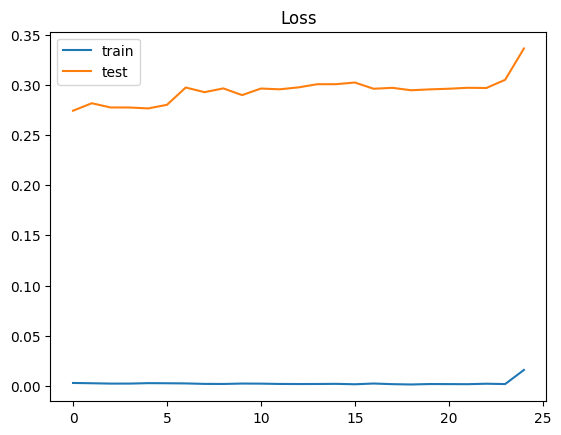

In [96]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

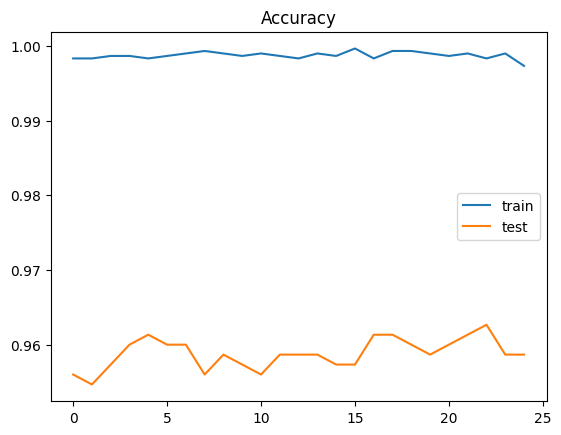

In [97]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [98]:
# Saving the tokenizer and the model:

import pickle

pickle.dump(tokenizer, open('video_classification-tokenizer.pkl', 'wb'))
model.save('video_classification-model.h5')